### Descriptive Statistics

Once again, to review, descriptive statistics refers to the statistical tools used to summarize a dataset. One of the first operations often used to get a sense of what a given data looks like is the mean operation

### Mean

You know what the mean is, you’ve heard it every time your computer science professor handed your midterms back and announced that the average, or mean, was a disappointing low of 59. Woops.
With that said, the “average” is just one of many summary statistics you might choose to describe the typical value or the central tendency of a sample. You can find the formal mathematical definition below. Note that μ is the symbol we use for mean.

$$\mu=\frac{1}{n}\sum_{i} x_i$$

In [1]:
data=[1,2,3,4,5,6]
def mean(t):
    return(float(sum(t)) / len(t))
mean(data)

3.5

In [2]:
import numpy as np
np.mean(data)

3.5

### Variance

In the same way that the mean is used to describe the central tendency, variance is intended to describe the spread.

$$ \sigma^2 = \frac {1}{n} \sum_i (x_i-\mu)^2  $$

The $x_i – \,u$ is called the “deviation from the mean”, making the variance the squared deviation divided by the number of samples. This is why the square root of the variance, σ, is called the standard deviation.
Using the mean function we created above, we’ll write up a function that calculates the variance:



In [3]:
def var(t, mu):
    dev2 = [(x - mu)**2 for x in t]
    var = mean(dev2)
    return(var)

Numpy also have a built-in function

In [6]:
np.var([1,3,3,6,3,2,7,5,9,1])

6.4

Test the above var function and check it against the Numpy function. Write the code below.

In [8]:
#code here

def mean(t):
    return sum(t) / len(t)

def var(t, mu):
    dev2 = [(x - mu)**2 for x in t]
    var = mean(dev2)
    return var

# Example usage
data = [1,3,3,6,3,2,7,5,9,1]
mu = mean(data)
variance = var(data, mu)
print(f"Variance: {variance}")

Variance: 6.4


### Histograms

The most common representation of a distribution is a histogram, which is a graph that shows the frequency or probability of each value. To get the frequencies, we can represent this with a dictionary

In [9]:
hist = {}
for x in data:
    hist[x] = hist.get(x,0) + 1
print(hist)

{1: 2, 3: 3, 6: 1, 2: 1, 7: 1, 5: 1, 9: 1}


We can convert these frequencies to probabilities if we divide each frequency by n, where n is the total count of items in the list. This process is called normalization. This normalized histogram is called a __PMF__, “probability mass function”, which is a function that maps values to probabilities. 

In [10]:
n = float(len(data))
pmf = {}
for x, freq in hist.items():
    pmf[x] = freq / n
print(pmf)

{1: 0.2, 3: 0.3, 6: 0.1, 2: 0.1, 7: 0.1, 5: 0.1, 9: 0.1}


Numpy also provides these functions:
```
mean = np.mean(data)
st_dev = np.std(data)
median = np.median(data)
maximum = np.max(data)
minimum = np.min(data)
```

In [12]:
mean = np.mean(data)
sd = np.std(data)
med = np.median(data)
max = np.max(data)
min = np.min(data)
print("Mean:", mean)
print("sd, med, max, min:", sd,med,max,min)

Mean: 4.0
sd, med, max, min: 2.5298221281347035 3.0 9 1


### Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This section will present a brief introduction to some of the tools using ___seaborn___ library for examining univariate and bivariate distributions. See: https://seaborn.pydata.org/tutorial.html

To enable inline image plot include this in the code:
%matplotlib inline

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE). The kernel density estimate is used for plotting the shape of a distribution. 

/var/folders/f7/lqjcwz1n2kb6zhtcyg6czvx40000gn/T/ipykernel_9836/2657132931.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x);


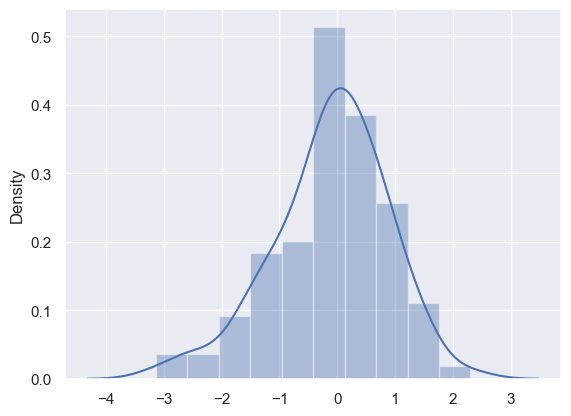

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats, integrate
import matplotlib.pyplot as plt

sns.set(color_codes=True)
x = np.random.normal(size=100)  #generate random data using numpy
y = np.random.normal(size=100)  #generate random data using numpy
sns.distplot(x);

When drawing histograms, the main choice you have is the number of bins to use and where to place them. distplot() uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

/var/folders/f7/lqjcwz1n2kb6zhtcyg6czvx40000gn/T/ipykernel_9836/445323498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=20, kde=False, rug=True);


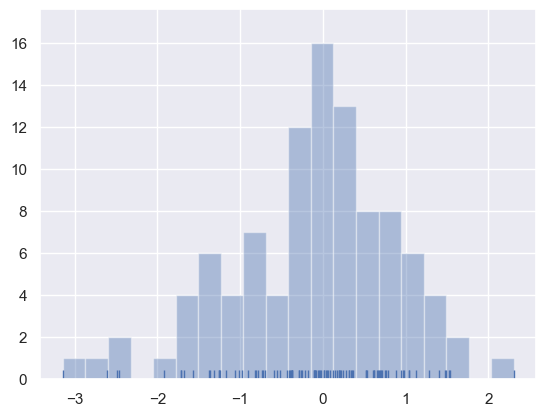

In [14]:
sns.distplot(x, bins=20, kde=False, rug=True);

### Fitting parametric distributions

You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data.

See https://docs.scipy.org/doc/scipy/reference/stats.html for models available.

/var/folders/f7/lqjcwz1n2kb6zhtcyg6czvx40000gn/T/ipykernel_9836/3841985658.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, fit=stats.gamma);


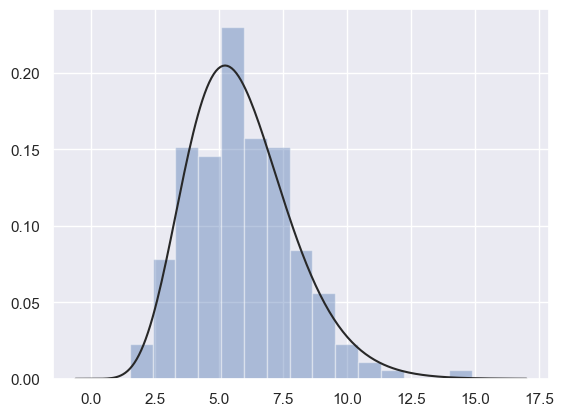

In [15]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

/var/folders/f7/lqjcwz1n2kb6zhtcyg6czvx40000gn/T/ipykernel_6372/3379354535.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, fit=stats.gennorm);


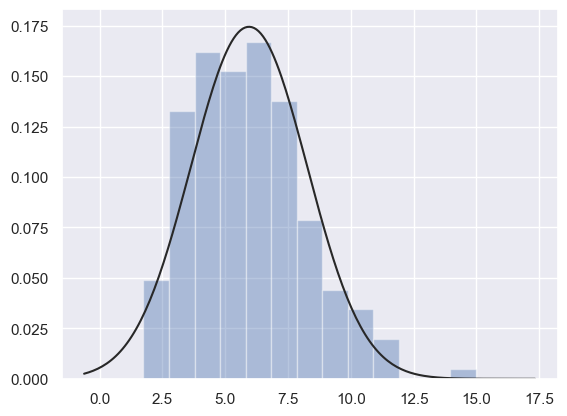

In [22]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gennorm);

### Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

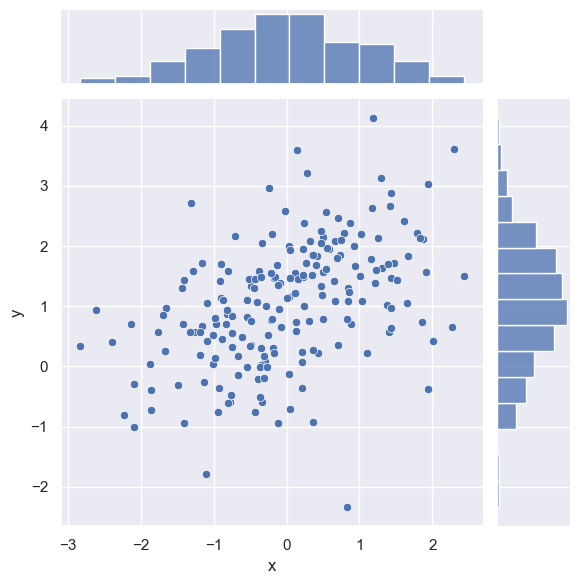

In [16]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);

### Bivariate kernel density estimation

It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot():

/var/folders/f7/lqjcwz1n2kb6zhtcyg6czvx40000gn/T/ipykernel_9836/1962958856.py:21: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.rugplot(y=df.y, vertical=True, ax=ax)


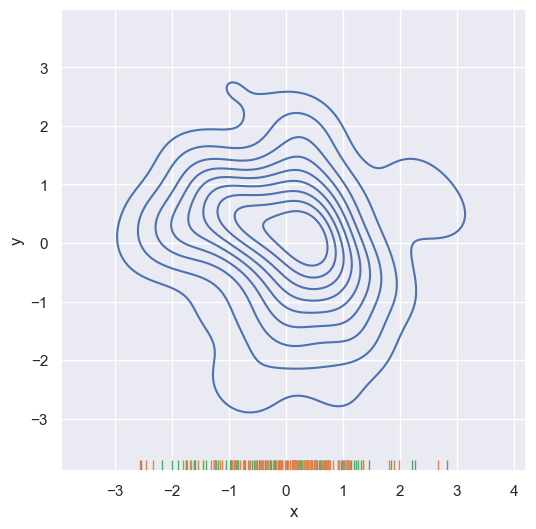

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data using numpy
x = np.random.normal(size=100)
y = np.random.normal(size=100)

# Create a DataFrame from the generated data
df = pd.DataFrame({
    'x': x,
    'y': y
})

f, ax = plt.subplots(figsize=(6, 6))

# Corrected kdeplot call with keyword arguments
sns.kdeplot(x=df.x, y=df.y, ax=ax)
sns.rugplot(x=df.x, color="g", ax=ax)
sns.rugplot(y=df.y, vertical=True, ax=ax)

plt.show()

### Exercise

Read in the data from datasaurus.csv using Pandas. See this link on how to use Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('datas.csv')
print(df.columns.values)#file header
df.head() #show first few rows

['dataset' 'x' 'y']


,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


The file datasaurus consists of multiple datasets indexed by the first column ('dataset'). In the example above the first dataset is labelled as 'dino'.


In [20]:
df.describe() #gives the summary statistic of the entire file; not useful here

,x,y
count,1846.000000,1846.000000
mean,54.265695,47.835099
std,16.713001,26.847766
min,15.560750,0.015119
25%,41.073403,22.561073
50%,52.591269,47.594450
75%,67.277845,71.810778
max,98.288123,99.694680


In [21]:
#display the unique row labels; these are the dataset names
df['dataset'].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [22]:
#select the dino dataset
dino=df['dataset']== "dino" #this only creates a boolean
dinos=df[dino] #assign to new dataframe

In [23]:
dinos.head() #display the dataframe first few rows

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


<Axes: xlabel='x', ylabel='y'>

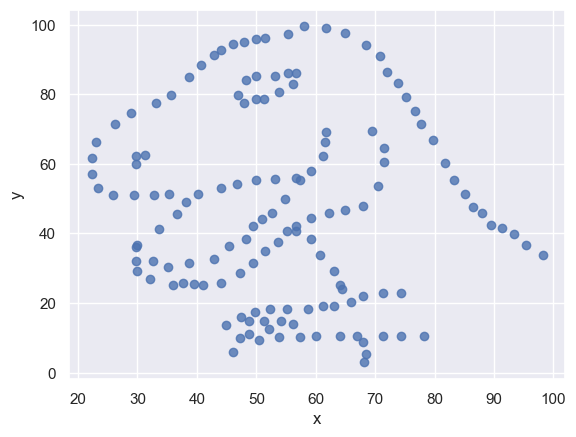

In [24]:
#plot the data as a scatterplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=dinos['x'],y=dinos['y'],fit_reg=False)


### Exercise 

Do the same for all the datasets in datas.csv file. What it means is find :

- x mean
- y mean
- x standard deviation
- y standard deviation
- plot the scatterplot 

Those datasets are:
'away', 'h_lines', 'v_lines', 'x_shape', 'star','high_lines', 'dots', circle', 'bullseye', 'slant_up','slant_down', 'wide_lines'

Put all the those mean and standard deviation in a table like this:

| dataset | mean x | mean y | sd x | sd y|
|---------|--------|--------|------|-----|
| dino    | 54     | 47     | 16   |  26 |

Explain the values and the scatter plot obtained. What conclusions can you derived from those descriptive summary statistics and the graphical plot?


In [25]:
# x mean
np.mean(dinos['x'])

54.26327323943662

In [26]:
# y mean
np.mean(dinos['y'])

47.832252816901416

In [27]:
# x standard deviation
np.std(dinos['x'])

16.70600555135667

In [28]:
# y standard deviation
np.std(dinos['y'])

26.840392949306764

| dataset | mean x | mean y | sd x | sd y|
|---------|--------|--------|------|-----|
| dino    | 54     | 47     | 16   |  26 |

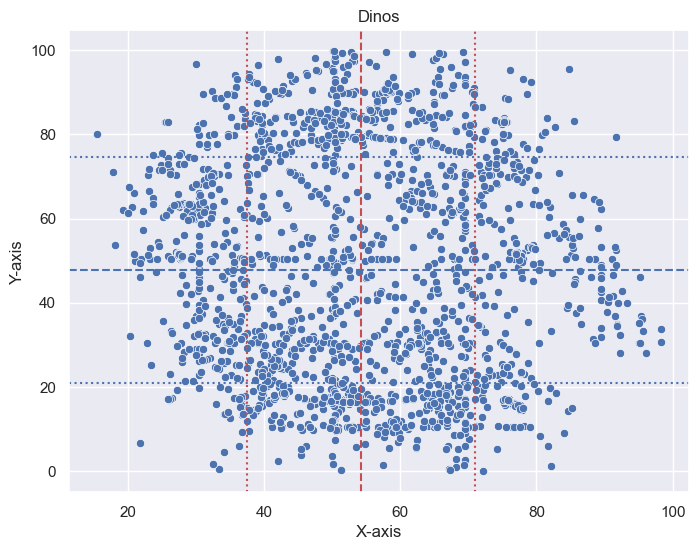

In [30]:
# Calculate mean and standard deviation
mean_x = df['x'].mean()
mean_y = df['y'].mean()
std_x = df['x'].std()
std_y = df['y'].std()

# Plot the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=df)
plt.title('Dinos')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot mean lines
plt.axvline(mean_x, color='r', linestyle='--', label=f'Mean X: {mean_x:.2f}')
plt.axhline(mean_y, color='b', linestyle='--', label=f'Mean Y: {mean_y:.2f}')

# Plot standard deviation lines
plt.axvline(mean_x + std_x, color='r', linestyle=':', label=f'Std X: {std_x:.2f}')
plt.axvline(mean_x - std_x, color='r', linestyle=':')
plt.axhline(mean_y + std_y, color='b', linestyle=':', label=f'Std Y: {std_y:.2f}')
plt.axhline(mean_y - std_y, color='b', linestyle=':')

plt.show()

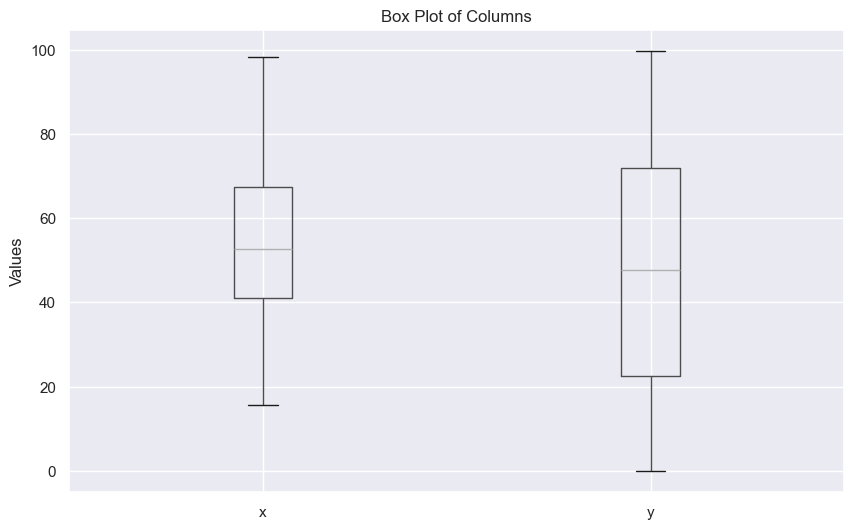

In [31]:
# Plot box plots for both columns
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot of Columns')
plt.ylabel('Values')
plt.show()

# Answer

## 1. Central Tendency:

The mean values (54.27 for the first column and 47.84 for the second column) indicate the central location of the data. The medians (52.59 and 47.59) are close to the means, suggesting a relatively symmetric distribution for both columns.

## 2. Dispersion:

The standard deviations (16.71 for the first column and 26.85 for the second column) indicate the spread of the data. The second column has a higher standard deviation, indicating more variability in the data compared to the first column.

## 3. Range:

The range (difference between the minimum and maximum values) for the first column is 82.73 (98.29 - 15.56), and for the second column, it is 99.68 (99.69 - 0.02). This indicates that the second column has a wider range of values.